## Polynomial Regression

Same as linear regression but in polynomial regressions equation, instead of normal x, we have x^2.
Linear tends to underfit because it tries to make a straight line for it's prediction.

The data has 3 columns: Position,Level,Salary. <br>
To find out why we use Polynomial regression, visualize the dataset with scatter plot:
- If the points form a straight line, linear regression is appropriate.
- If the points curve or show a non-linear pattern, consider polynomial regression.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('../Data/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

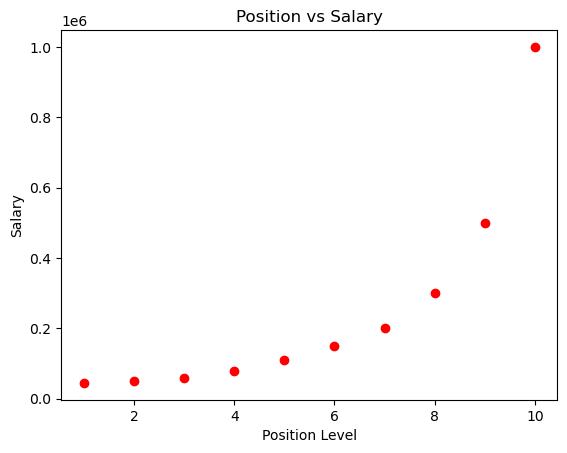

In [2]:
plt.scatter(X, y, color='red')
plt.title('Position vs Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Training the Linear Regression model on the whole dataset

**Fit:**
- To compute the necessary statistics (like mean and variance for scaling, or coefficients for models) from the data.
- This method is called on the training data to learn the parameters.

**Transform:**
- To apply the learned parameters to the data.
- This method is used to transform the data based on the statistics computed by fit.

**Fit_transform:**
- A combination of fit and transform in one step.
- This method is typically used on training data to both learn the parameters and immediately transform the data.

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y) # fit: learn the parameters from the training data (X, y)

LinearRegression()

The fit method is used to train the linear regression model on the original feature set X and the target variable y.

It learns the coefficients (slope) and intercept of the linear equation based on the data provided.

Linear regression operates directly on the original features, it does not need any transformations before fitting the model.

### Training the Polynomial Regression model on the whole dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
# A higher degree (like 4) can model more complex patterns, but increases the risk of overfitting,
# where the model fits the training data too closely and performs poorly on unseen data.

X_poly = poly_reg.fit_transform(X)
# here we use fit_transform because:
# - fit: learns the parameters from the data (X).
# - transform: create a new variable to store the transformed data to include polynomial features based on the learned parameters.
# basically, fit: learns about the X, transform: applies what it learned to X to create X_poly.

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y) # fit: learn the parameters from the transformed training data (X_poly, y)

LinearRegression()

The fit_transform method is used to both compute the polynomial features and transform the original feature set X into a new feature set X_poly.

It generates new features based on the polynomial combinations of the original features (up to the specified degree).

After fit_transform the data to get the polynomial features, it returns new feature set X_poly, then fit the linear regression model.

### Visualising the Linear Regression results

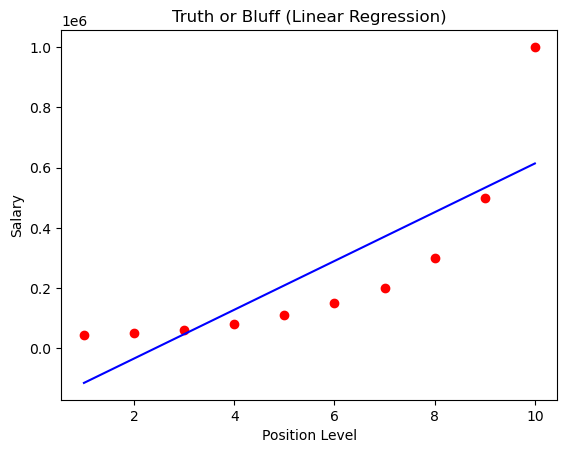

In [5]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [12]:
from sklearn.metrics import r2_score
y_pred_linear = lin_reg.predict(X)
r2_linear = r2_score(y, y_pred_linear)
print(f'R^2: {r2_linear}')

R^2: 0.6690412331929895


### Visualising the Polynomial Regression results

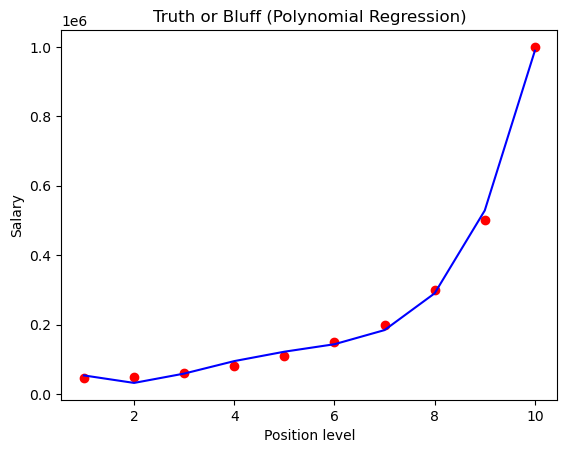

In [6]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [13]:
y_pred_poly = lin_reg_2.predict(X_poly)
r2_poly = r2_score(y, y_pred_poly)
print(f'R^2: {r2_poly}')

R^2: 0.9973922891706614


Predicting a new result with Linear Regression

In [8]:
lin_reg.predict([[6.5]])

array([330378.78787879])

Predicting a new result with Polynomial Regression

In [9]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265157])